In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

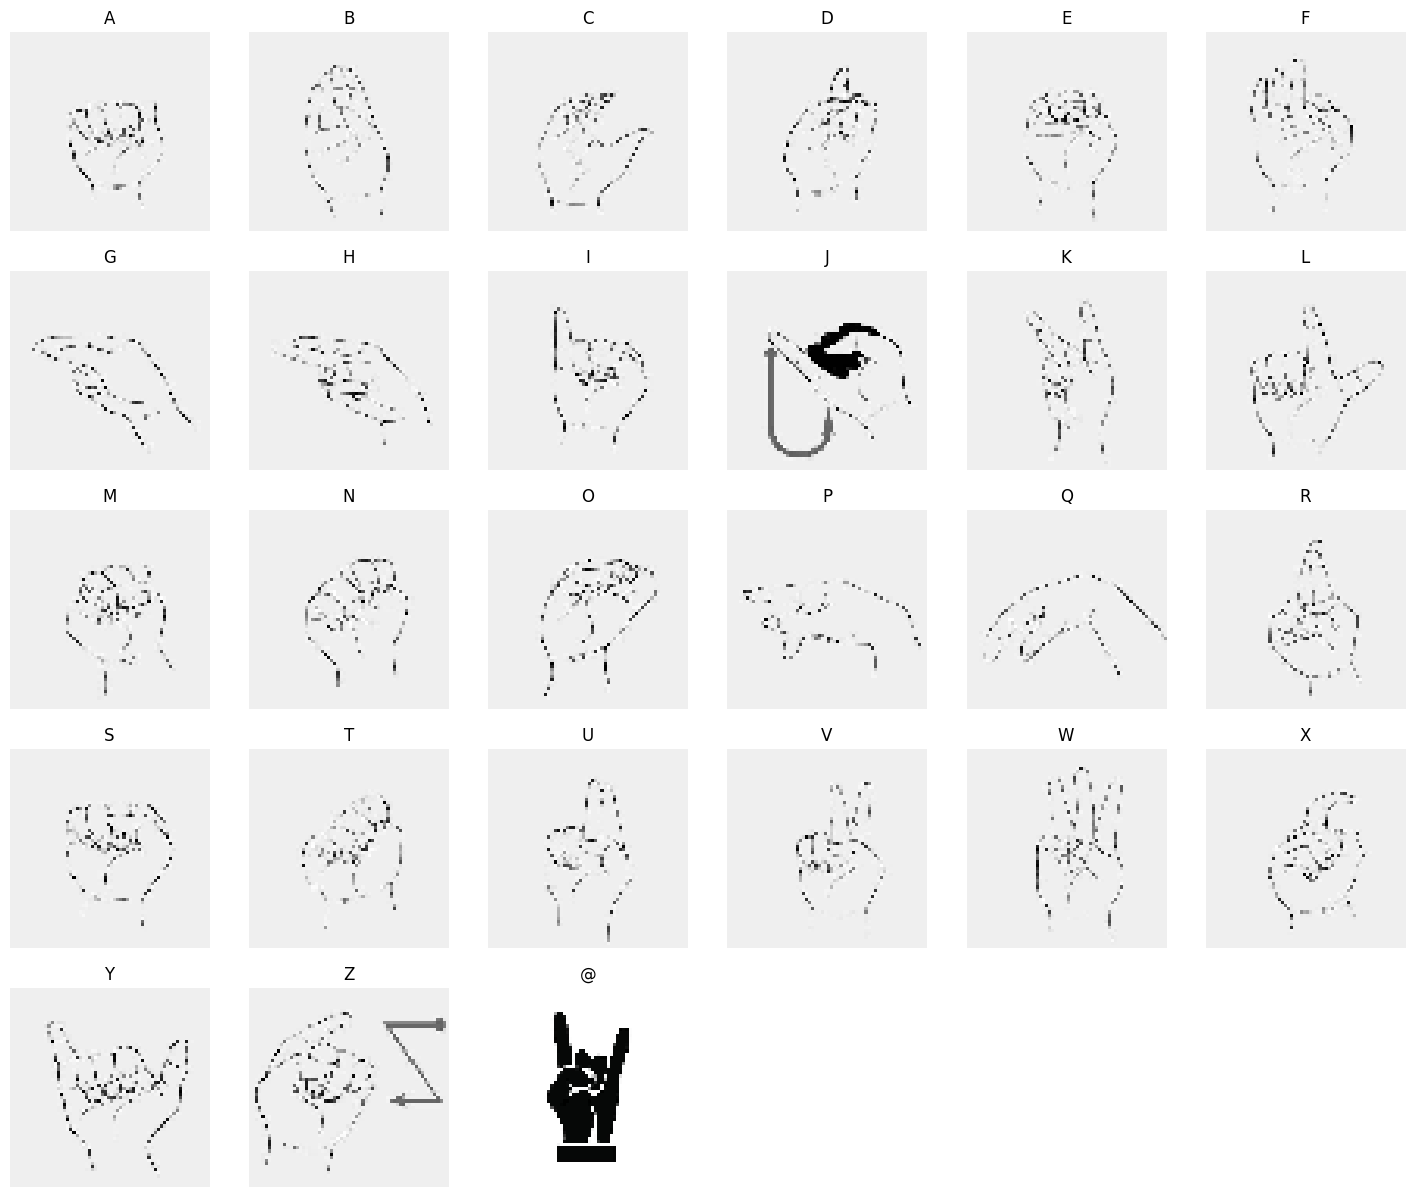

In [2]:
lists=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K','L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X','Y', 'Z','@']
nrow, ncol = 5,6
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)#letter size
for row in range(len(lists)):
#         print(lists[row])
        # load image
        img = image.load_img('E:/xampp/htdocs/sign/image/' + lists[row] + '.jpg', target_size = (64, 64))
        plt.subplot(nrow, ncol, row + 1)
        plt.imshow(img)
        plt.title(lists[row])
        plt.axis('off')

In [3]:
TRAIN_PATH = r'E:/xampp/htdocs/sign/train'
TEST_PATH = r'E:/xampp/htdocs/sign/test1'
VALID_PATH = r'E:/xampp/htdocs/sign/validate1'

In [4]:
train_set = {}
validation_set = {}
test_set = {}

for cat in os.listdir(TRAIN_PATH):
    cat_dir = os.path.join(TRAIN_PATH, cat)

    if os.path.isdir(cat_dir):  # Check if it's a directory
        cat_files = [f for f in os.listdir(cat_dir) if os.path.isfile(os.path.join(cat_dir, f))]

        # Training set's size is 70% of the data
        train_list, test_list = train_test_split(cat_files, test_size=0.3)

        # Validation set's and Test set's size are both 15% of the data
        validation_list, test_list = train_test_split(test_list, test_size=0.5)

        train_set[cat] = train_list
        validation_set[cat] = validation_list
        test_set[cat] = test_list

In [5]:
for cat in tqdm(train_set.keys()):
  cat_dir = TRAIN_PATH;
  for file in train_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(TRAIN_PATH, cat, file)
#     print(src)
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [04:23<00:00,  9.75s/it]


In [6]:
VALID_PATH = r'E:\xampp\htdocs\sign\validate1'
for cat in tqdm(validation_set.keys()):
  cat_dir = VALID_PATH;
#   os.makedirs(cat_dir)
  for file in validation_set[cat]:
    src = os.path.join(TRAIN_PATH, cat, file)
    print(src)

    dest = os.path.join(VALID_PATH, file)
    copyfile(src, dest)

  4%|███                                                                                | 1/27 [00:00<00:04,  6.02it/s]

E:/xampp/htdocs/sign/train\@\space0020_test.jpg
E:/xampp/htdocs/sign/train\@\space0005_test.jpg
E:/xampp/htdocs/sign/train\@\space0030_test.jpg
E:/xampp/htdocs/sign/train\@\space0026_test.jpg
E:/xampp/htdocs/sign/train\A\A883.jpg
E:/xampp/htdocs/sign/train\A\A102.jpg
E:/xampp/htdocs/sign/train\A\A801.jpg
E:/xampp/htdocs/sign/train\A\A757.jpg
E:/xampp/htdocs/sign/train\A\A272.jpg
E:/xampp/htdocs/sign/train\A\A80.jpg
E:/xampp/htdocs/sign/train\A\A101.jpg
E:/xampp/htdocs/sign/train\A\A819.jpg
E:/xampp/htdocs/sign/train\A\A420.jpg
E:/xampp/htdocs/sign/train\A\A196.jpg
E:/xampp/htdocs/sign/train\A\A477.jpg
E:/xampp/htdocs/sign/train\A\A812.jpg
E:/xampp/htdocs/sign/train\A\A549.jpg
E:/xampp/htdocs/sign/train\A\A512.jpg
E:/xampp/htdocs/sign/train\A\A670.jpg
E:/xampp/htdocs/sign/train\A\A730.jpg
E:/xampp/htdocs/sign/train\A\A286.jpg
E:/xampp/htdocs/sign/train\A\A476.jpg
E:/xampp/htdocs/sign/train\A\A308.jpg
E:/xampp/htdocs/sign/train\A\A368.jpg
E:/xampp/htdocs/sign/train\A\A280.jpg
E:/xampp/ht


  7%|██████▏                                                                            | 2/27 [00:03<00:56,  2.25s/it]

E:/xampp/htdocs/sign/train\A\A393.jpg
E:/xampp/htdocs/sign/train\A\A705.jpg
E:/xampp/htdocs/sign/train\B\B664.jpg
E:/xampp/htdocs/sign/train\B\B141.jpg
E:/xampp/htdocs/sign/train\B\B326.jpg
E:/xampp/htdocs/sign/train\B\B77.jpg
E:/xampp/htdocs/sign/train\B\B844.jpg
E:/xampp/htdocs/sign/train\B\B899.jpg
E:/xampp/htdocs/sign/train\B\B100.jpg
E:/xampp/htdocs/sign/train\B\B494.jpg
E:/xampp/htdocs/sign/train\B\B533.jpg
E:/xampp/htdocs/sign/train\B\B712.jpg
E:/xampp/htdocs/sign/train\B\B277.jpg
E:/xampp/htdocs/sign/train\B\B115.jpg
E:/xampp/htdocs/sign/train\B\B171.jpg
E:/xampp/htdocs/sign/train\B\B628.jpg
E:/xampp/htdocs/sign/train\B\B777.jpg
E:/xampp/htdocs/sign/train\B\B875.jpg
E:/xampp/htdocs/sign/train\B\B696.jpg
E:/xampp/htdocs/sign/train\B\B496.jpg
E:/xampp/htdocs/sign/train\B\B648.jpg
E:/xampp/htdocs/sign/train\B\B26.jpg
E:/xampp/htdocs/sign/train\B\B801.jpg
E:/xampp/htdocs/sign/train\B\B255.jpg
E:/xampp/htdocs/sign/train\B\B866.jpg
E:/xampp/htdocs/sign/train\B\B859.jpg
E:/xampp/htdoc


 11%|█████████▏                                                                         | 3/27 [00:07<01:12,  3.02s/it]

E:/xampp/htdocs/sign/train\B\B891.jpg
E:/xampp/htdocs/sign/train\B\B344.jpg
E:/xampp/htdocs/sign/train\B\B317.jpg
E:/xampp/htdocs/sign/train\C\C789.jpg
E:/xampp/htdocs/sign/train\C\C694.jpg
E:/xampp/htdocs/sign/train\C\C651.jpg
E:/xampp/htdocs/sign/train\C\C777.jpg
E:/xampp/htdocs/sign/train\C\C605.jpg
E:/xampp/htdocs/sign/train\C\C587.jpg
E:/xampp/htdocs/sign/train\C\C722.jpg
E:/xampp/htdocs/sign/train\C\C456.jpg
E:/xampp/htdocs/sign/train\C\C271.jpg
E:/xampp/htdocs/sign/train\C\C588.jpg
E:/xampp/htdocs/sign/train\C\C604.jpg
E:/xampp/htdocs/sign/train\C\C507.jpg
E:/xampp/htdocs/sign/train\C\C192.jpg
E:/xampp/htdocs/sign/train\C\C4.jpg
E:/xampp/htdocs/sign/train\C\C47.jpg
E:/xampp/htdocs/sign/train\C\C136.jpg
E:/xampp/htdocs/sign/train\C\C741.jpg
E:/xampp/htdocs/sign/train\C\C211.jpg
E:/xampp/htdocs/sign/train\C\C790.jpg
E:/xampp/htdocs/sign/train\C\C413.jpg
E:/xampp/htdocs/sign/train\C\C232.jpg
E:/xampp/htdocs/sign/train\C\C313.jpg
E:/xampp/htdocs/sign/train\C\C306.jpg
E:/xampp/htdocs


 15%|████████████▎                                                                      | 4/27 [00:12<01:27,  3.83s/it]

E:/xampp/htdocs/sign/train\C\C361.jpg
E:/xampp/htdocs/sign/train\C\C884.jpg
E:/xampp/htdocs/sign/train\D\D438.jpg
E:/xampp/htdocs/sign/train\D\D310.jpg
E:/xampp/htdocs/sign/train\D\D252.jpg
E:/xampp/htdocs/sign/train\D\D517.jpg
E:/xampp/htdocs/sign/train\D\D389.jpg
E:/xampp/htdocs/sign/train\D\D253.jpg
E:/xampp/htdocs/sign/train\D\D206.jpg
E:/xampp/htdocs/sign/train\D\D864.jpg
E:/xampp/htdocs/sign/train\D\D563.jpg
E:/xampp/htdocs/sign/train\D\D198.jpg
E:/xampp/htdocs/sign/train\D\D675.jpg
E:/xampp/htdocs/sign/train\D\D737.jpg
E:/xampp/htdocs/sign/train\D\D329.jpg
E:/xampp/htdocs/sign/train\D\D399.jpg
E:/xampp/htdocs/sign/train\D\D734.jpg
E:/xampp/htdocs/sign/train\D\D419.jpg
E:/xampp/htdocs/sign/train\D\D727.jpg
E:/xampp/htdocs/sign/train\D\D3.jpg
E:/xampp/htdocs/sign/train\D\D457.jpg
E:/xampp/htdocs/sign/train\D\D546.jpg
E:/xampp/htdocs/sign/train\D\D266.jpg
E:/xampp/htdocs/sign/train\D\D558.jpg
E:/xampp/htdocs/sign/train\D\D11.jpg
E:/xampp/htdocs/sign/train\D\D625.jpg
E:/xampp/htdocs


 19%|███████████████▎                                                                   | 5/27 [00:16<01:25,  3.88s/it]

E:/xampp/htdocs/sign/train\D\D318.jpg
E:/xampp/htdocs/sign/train\D\D283.jpg
E:/xampp/htdocs/sign/train\D\D45.jpg
E:/xampp/htdocs/sign/train\D\D655.jpg
E:/xampp/htdocs/sign/train\D\D138.jpg
E:/xampp/htdocs/sign/train\D\D247.jpg
E:/xampp/htdocs/sign/train\D\D874.jpg
E:/xampp/htdocs/sign/train\E\E753.jpg
E:/xampp/htdocs/sign/train\E\E833.jpg
E:/xampp/htdocs/sign/train\E\E131.jpg
E:/xampp/htdocs/sign/train\E\E319.jpg
E:/xampp/htdocs/sign/train\E\E735.jpg
E:/xampp/htdocs/sign/train\E\E107.jpg
E:/xampp/htdocs/sign/train\E\E619.jpg
E:/xampp/htdocs/sign/train\E\E893.jpg
E:/xampp/htdocs/sign/train\E\E287.jpg
E:/xampp/htdocs/sign/train\E\E692.jpg
E:/xampp/htdocs/sign/train\E\E809.jpg
E:/xampp/htdocs/sign/train\E\E767.jpg
E:/xampp/htdocs/sign/train\E\E756.jpg
E:/xampp/htdocs/sign/train\E\E724.jpg
E:/xampp/htdocs/sign/train\E\E1.jpg
E:/xampp/htdocs/sign/train\E\E117.jpg
E:/xampp/htdocs/sign/train\E\E517.jpg
E:/xampp/htdocs/sign/train\E\E295.jpg
E:/xampp/htdocs/sign/train\E\E866.jpg
E:/xampp/htdocs


 22%|██████████████████▍                                                                | 6/27 [00:20<01:21,  3.87s/it]

E:/xampp/htdocs/sign/train\E\E194.jpg
E:/xampp/htdocs/sign/train\E\E187.jpg
E:/xampp/htdocs/sign/train\E\E714.jpg
E:/xampp/htdocs/sign/train\E\E494.jpg
E:/xampp/htdocs/sign/train\E\E237.jpg
E:/xampp/htdocs/sign/train\E\E83.jpg
E:/xampp/htdocs/sign/train\F\F344.jpg
E:/xampp/htdocs/sign/train\F\F810.jpg
E:/xampp/htdocs/sign/train\F\F124.jpg
E:/xampp/htdocs/sign/train\F\F126.jpg
E:/xampp/htdocs/sign/train\F\F149.jpg
E:/xampp/htdocs/sign/train\F\F227.jpg
E:/xampp/htdocs/sign/train\F\F144.jpg
E:/xampp/htdocs/sign/train\F\F619.jpg
E:/xampp/htdocs/sign/train\F\F383.jpg
E:/xampp/htdocs/sign/train\F\F78.jpg
E:/xampp/htdocs/sign/train\F\F202.jpg
E:/xampp/htdocs/sign/train\F\F133.jpg
E:/xampp/htdocs/sign/train\F\F569.jpg
E:/xampp/htdocs/sign/train\F\F616.jpg
E:/xampp/htdocs/sign/train\F\F288.jpg
E:/xampp/htdocs/sign/train\F\F237.jpg
E:/xampp/htdocs/sign/train\F\F280.jpg
E:/xampp/htdocs/sign/train\F\F217.jpg
E:/xampp/htdocs/sign/train\F\F359.jpg
E:/xampp/htdocs/sign/train\F\F639.jpg
E:/xampp/htdoc


 26%|█████████████████████▌                                                             | 7/27 [00:24<01:19,  3.95s/it]

E:/xampp/htdocs/sign/train\F\F338.jpg
E:/xampp/htdocs/sign/train\F\F578.jpg
E:/xampp/htdocs/sign/train\F\F673.jpg
E:/xampp/htdocs/sign/train\F\F286.jpg
E:/xampp/htdocs/sign/train\F\F60.jpg
E:/xampp/htdocs/sign/train\G\G71.jpg
E:/xampp/htdocs/sign/train\G\G549.jpg
E:/xampp/htdocs/sign/train\G\G710.jpg
E:/xampp/htdocs/sign/train\G\G563.jpg
E:/xampp/htdocs/sign/train\G\G488.jpg
E:/xampp/htdocs/sign/train\G\G300.jpg
E:/xampp/htdocs/sign/train\G\G234.jpg
E:/xampp/htdocs/sign/train\G\G491.jpg
E:/xampp/htdocs/sign/train\G\G528.jpg
E:/xampp/htdocs/sign/train\G\G495.jpg
E:/xampp/htdocs/sign/train\G\G768.jpg
E:/xampp/htdocs/sign/train\G\G199.jpg
E:/xampp/htdocs/sign/train\G\G535.jpg
E:/xampp/htdocs/sign/train\G\G831.jpg
E:/xampp/htdocs/sign/train\G\G134.jpg
E:/xampp/htdocs/sign/train\G\G415.jpg
E:/xampp/htdocs/sign/train\G\G885.jpg
E:/xampp/htdocs/sign/train\G\G711.jpg
E:/xampp/htdocs/sign/train\G\G181.jpg
E:/xampp/htdocs/sign/train\G\G12.jpg
E:/xampp/htdocs/sign/train\G\G642.jpg
E:/xampp/htdocs


 30%|████████████████████████▌                                                          | 8/27 [00:28<01:14,  3.94s/it]

E:/xampp/htdocs/sign/train\H\H704.jpg
E:/xampp/htdocs/sign/train\H\H111.jpg
E:/xampp/htdocs/sign/train\H\H110.jpg
E:/xampp/htdocs/sign/train\H\H692.jpg
E:/xampp/htdocs/sign/train\H\H743.jpg
E:/xampp/htdocs/sign/train\H\H210.jpg
E:/xampp/htdocs/sign/train\H\H850.jpg
E:/xampp/htdocs/sign/train\H\H370.jpg
E:/xampp/htdocs/sign/train\H\H690.jpg
E:/xampp/htdocs/sign/train\H\H551.jpg
E:/xampp/htdocs/sign/train\H\H464.jpg
E:/xampp/htdocs/sign/train\H\H420.jpg
E:/xampp/htdocs/sign/train\H\H237.jpg
E:/xampp/htdocs/sign/train\H\H386.jpg
E:/xampp/htdocs/sign/train\H\H558.jpg
E:/xampp/htdocs/sign/train\H\H408.jpg
E:/xampp/htdocs/sign/train\H\H335.jpg
E:/xampp/htdocs/sign/train\H\H94.jpg
E:/xampp/htdocs/sign/train\H\H74.jpg
E:/xampp/htdocs/sign/train\H\H894.jpg
E:/xampp/htdocs/sign/train\H\H628.jpg
E:/xampp/htdocs/sign/train\H\H372.jpg
E:/xampp/htdocs/sign/train\H\H425.jpg
E:/xampp/htdocs/sign/train\H\H414.jpg
E:/xampp/htdocs/sign/train\H\H664.jpg
E:/xampp/htdocs/sign/train\H\H344.jpg
E:/xampp/htdoc


 33%|███████████████████████████▋                                                       | 9/27 [00:32<01:07,  3.76s/it]

E:/xampp/htdocs/sign/train\H\H66.jpg
E:/xampp/htdocs/sign/train\H\H719.jpg
E:/xampp/htdocs/sign/train\H\H554.jpg
E:/xampp/htdocs/sign/train\H\H388.jpg
E:/xampp/htdocs/sign/train\H\H675.jpg
E:/xampp/htdocs/sign/train\H\H809.jpg
E:/xampp/htdocs/sign/train\H\H812.jpg
E:/xampp/htdocs/sign/train\H\H267.jpg
E:/xampp/htdocs/sign/train\H\H272.jpg
E:/xampp/htdocs/sign/train\H\H33.jpg
E:/xampp/htdocs/sign/train\H\H479.jpg
E:/xampp/htdocs/sign/train\H\H321.jpg
E:/xampp/htdocs/sign/train\H\H739.jpg
E:/xampp/htdocs/sign/train\I\I616.jpg
E:/xampp/htdocs/sign/train\I\I52.jpg
E:/xampp/htdocs/sign/train\I\I450.jpg
E:/xampp/htdocs/sign/train\I\I895.jpg
E:/xampp/htdocs/sign/train\I\I206.jpg
E:/xampp/htdocs/sign/train\I\I759.jpg
E:/xampp/htdocs/sign/train\I\I153.jpg
E:/xampp/htdocs/sign/train\I\I232.jpg
E:/xampp/htdocs/sign/train\I\I669.jpg
E:/xampp/htdocs/sign/train\I\I371.jpg
E:/xampp/htdocs/sign/train\I\I517.jpg
E:/xampp/htdocs/sign/train\I\I205.jpg
E:/xampp/htdocs/sign/train\I\I93.jpg
E:/xampp/htdocs/


 37%|██████████████████████████████▎                                                   | 10/27 [00:35<01:00,  3.55s/it]

E:/xampp/htdocs/sign/train\I\I224.jpg
E:/xampp/htdocs/sign/train\I\I112.jpg
E:/xampp/htdocs/sign/train\I\I419.jpg
E:/xampp/htdocs/sign/train\I\I806.jpg
E:/xampp/htdocs/sign/train\I\I245.jpg
E:/xampp/htdocs/sign/train\J\J805.jpg
E:/xampp/htdocs/sign/train\J\J681.jpg
E:/xampp/htdocs/sign/train\J\J340.jpg
E:/xampp/htdocs/sign/train\J\J422.jpg
E:/xampp/htdocs/sign/train\J\J682.jpg
E:/xampp/htdocs/sign/train\J\J173.jpg
E:/xampp/htdocs/sign/train\J\J813.jpg
E:/xampp/htdocs/sign/train\J\J692.jpg
E:/xampp/htdocs/sign/train\J\J313.jpg
E:/xampp/htdocs/sign/train\J\J610.jpg
E:/xampp/htdocs/sign/train\J\J714.jpg
E:/xampp/htdocs/sign/train\J\J485.jpg
E:/xampp/htdocs/sign/train\J\J740.jpg
E:/xampp/htdocs/sign/train\J\J269.jpg
E:/xampp/htdocs/sign/train\J\J14.jpg
E:/xampp/htdocs/sign/train\J\J347.jpg
E:/xampp/htdocs/sign/train\J\J464.jpg
E:/xampp/htdocs/sign/train\J\J546.jpg
E:/xampp/htdocs/sign/train\J\J483.jpg
E:/xampp/htdocs/sign/train\J\J139.jpg
E:/xampp/htdocs/sign/train\J\J685.jpg
E:/xampp/htdo


 41%|█████████████████████████████████▍                                                | 11/27 [00:38<00:53,  3.37s/it]

E:/xampp/htdocs/sign/train\J\J12.jpg
E:/xampp/htdocs/sign/train\K\K407.jpg
E:/xampp/htdocs/sign/train\K\K64.jpg
E:/xampp/htdocs/sign/train\K\K462.jpg
E:/xampp/htdocs/sign/train\K\K165.jpg
E:/xampp/htdocs/sign/train\K\K595.jpg
E:/xampp/htdocs/sign/train\K\K663.jpg
E:/xampp/htdocs/sign/train\K\K490.jpg
E:/xampp/htdocs/sign/train\K\K662.jpg
E:/xampp/htdocs/sign/train\K\K832.jpg
E:/xampp/htdocs/sign/train\K\K868.jpg
E:/xampp/htdocs/sign/train\K\K482.jpg
E:/xampp/htdocs/sign/train\K\K837.jpg
E:/xampp/htdocs/sign/train\K\K856.jpg
E:/xampp/htdocs/sign/train\K\K700.jpg
E:/xampp/htdocs/sign/train\K\K478.jpg
E:/xampp/htdocs/sign/train\K\K479.jpg
E:/xampp/htdocs/sign/train\K\K495.jpg
E:/xampp/htdocs/sign/train\K\K430.jpg
E:/xampp/htdocs/sign/train\K\K49.jpg
E:/xampp/htdocs/sign/train\K\K196.jpg
E:/xampp/htdocs/sign/train\K\K606.jpg
E:/xampp/htdocs/sign/train\K\K141.jpg
E:/xampp/htdocs/sign/train\K\K760.jpg
E:/xampp/htdocs/sign/train\K\K755.jpg
E:/xampp/htdocs/sign/train\K\K150.jpg
E:/xampp/htdocs


 44%|████████████████████████████████████▍                                             | 12/27 [00:40<00:44,  2.99s/it]

E:/xampp/htdocs/sign/train\K\K338.jpg
E:/xampp/htdocs/sign/train\K\K409.jpg
E:/xampp/htdocs/sign/train\K\K510.jpg
E:/xampp/htdocs/sign/train\K\K188.jpg
E:/xampp/htdocs/sign/train\K\K388.jpg
E:/xampp/htdocs/sign/train\K\K795.jpg
E:/xampp/htdocs/sign/train\K\K670.jpg
E:/xampp/htdocs/sign/train\K\K459.jpg
E:/xampp/htdocs/sign/train\K\K653.jpg
E:/xampp/htdocs/sign/train\K\K229.jpg
E:/xampp/htdocs/sign/train\K\K496.jpg
E:/xampp/htdocs/sign/train\K\K533.jpg
E:/xampp/htdocs/sign/train\K\K444.jpg
E:/xampp/htdocs/sign/train\K\K142.jpg
E:/xampp/htdocs/sign/train\K\K173.jpg
E:/xampp/htdocs/sign/train\K\K185.jpg
E:/xampp/htdocs/sign/train\K\K60.jpg
E:/xampp/htdocs/sign/train\K\K376.jpg
E:/xampp/htdocs/sign/train\K\K714.jpg
E:/xampp/htdocs/sign/train\L\L89.jpg
E:/xampp/htdocs/sign/train\L\L414.jpg
E:/xampp/htdocs/sign/train\L\L534.jpg
E:/xampp/htdocs/sign/train\L\L244.jpg
E:/xampp/htdocs/sign/train\L\L926.jpg
E:/xampp/htdocs/sign/train\L\L324.jpg
E:/xampp/htdocs/sign/train\L\L602.jpg
E:/xampp/htdoc


 48%|███████████████████████████████████████▍                                          | 13/27 [00:43<00:42,  3.00s/it]

E:/xampp/htdocs/sign/train\L\L76.jpg
E:/xampp/htdocs/sign/train\L\L338.jpg
E:/xampp/htdocs/sign/train\L\L744.jpg
E:/xampp/htdocs/sign/train\L\L535.jpg
E:/xampp/htdocs/sign/train\L\L368.jpg
E:/xampp/htdocs/sign/train\M\M397.jpg
E:/xampp/htdocs/sign/train\M\M51.jpg
E:/xampp/htdocs/sign/train\M\M515.jpg
E:/xampp/htdocs/sign/train\M\M33.jpg
E:/xampp/htdocs/sign/train\M\M845.jpg
E:/xampp/htdocs/sign/train\M\M65.jpg
E:/xampp/htdocs/sign/train\M\M305.jpg
E:/xampp/htdocs/sign/train\M\M814.jpg
E:/xampp/htdocs/sign/train\M\M307.jpg
E:/xampp/htdocs/sign/train\M\M56.jpg
E:/xampp/htdocs/sign/train\M\M372.jpg
E:/xampp/htdocs/sign/train\M\M463.jpg
E:/xampp/htdocs/sign/train\M\M14.jpg
E:/xampp/htdocs/sign/train\M\M473.jpg
E:/xampp/htdocs/sign/train\M\M517.jpg
E:/xampp/htdocs/sign/train\M\M575.jpg
E:/xampp/htdocs/sign/train\M\M381.jpg
E:/xampp/htdocs/sign/train\M\M846.jpg
E:/xampp/htdocs/sign/train\M\M519.jpg
E:/xampp/htdocs/sign/train\M\M340.jpg
E:/xampp/htdocs/sign/train\M\M760.jpg
E:/xampp/htdocs/si


 52%|██████████████████████████████████████████▌                                       | 14/27 [00:46<00:38,  3.00s/it]

E:/xampp/htdocs/sign/train\M\M537.jpg
E:/xampp/htdocs/sign/train\N\N835.jpg
E:/xampp/htdocs/sign/train\N\N745.jpg
E:/xampp/htdocs/sign/train\N\N2.jpg
E:/xampp/htdocs/sign/train\N\N615.jpg
E:/xampp/htdocs/sign/train\N\N442.jpg
E:/xampp/htdocs/sign/train\N\N899.jpg
E:/xampp/htdocs/sign/train\N\N864.jpg
E:/xampp/htdocs/sign/train\N\N48.jpg
E:/xampp/htdocs/sign/train\N\N696.jpg
E:/xampp/htdocs/sign/train\N\N712.jpg
E:/xampp/htdocs/sign/train\N\N130.jpg
E:/xampp/htdocs/sign/train\N\N721.jpg
E:/xampp/htdocs/sign/train\N\N47.jpg
E:/xampp/htdocs/sign/train\N\N506.jpg
E:/xampp/htdocs/sign/train\N\N307.jpg
E:/xampp/htdocs/sign/train\N\N250.jpg
E:/xampp/htdocs/sign/train\N\N675.jpg
E:/xampp/htdocs/sign/train\N\N555.jpg
E:/xampp/htdocs/sign/train\N\N73.jpg
E:/xampp/htdocs/sign/train\N\N793.jpg
E:/xampp/htdocs/sign/train\N\N594.jpg
E:/xampp/htdocs/sign/train\N\N21.jpg
E:/xampp/htdocs/sign/train\N\N481.jpg
E:/xampp/htdocs/sign/train\N\N724.jpg
E:/xampp/htdocs/sign/train\N\N852.jpg
E:/xampp/htdocs/si


 56%|█████████████████████████████████████████████▌                                    | 15/27 [00:49<00:35,  2.96s/it]

E:/xampp/htdocs/sign/train\N\N687.jpg
E:/xampp/htdocs/sign/train\N\N450.jpg
E:/xampp/htdocs/sign/train\N\N318.jpg
E:/xampp/htdocs/sign/train\N\N186.jpg
E:/xampp/htdocs/sign/train\N\N841.jpg
E:/xampp/htdocs/sign/train\N\N619.jpg
E:/xampp/htdocs/sign/train\N\N83.jpg
E:/xampp/htdocs/sign/train\N\N476.jpg
E:/xampp/htdocs/sign/train\N\N525.jpg
E:/xampp/htdocs/sign/train\O\O52.jpg
E:/xampp/htdocs/sign/train\O\O304.jpg
E:/xampp/htdocs/sign/train\O\O342.jpg
E:/xampp/htdocs/sign/train\O\O496.jpg
E:/xampp/htdocs/sign/train\O\O702.jpg
E:/xampp/htdocs/sign/train\O\O291.jpg
E:/xampp/htdocs/sign/train\O\O853.jpg
E:/xampp/htdocs/sign/train\O\O473.jpg
E:/xampp/htdocs/sign/train\O\O33.jpg
E:/xampp/htdocs/sign/train\O\O669.jpg
E:/xampp/htdocs/sign/train\O\O60.jpg
E:/xampp/htdocs/sign/train\O\O230.jpg
E:/xampp/htdocs/sign/train\O\O307.jpg
E:/xampp/htdocs/sign/train\O\O337.jpg
E:/xampp/htdocs/sign/train\O\O348.jpg
E:/xampp/htdocs/sign/train\O\O232.jpg
E:/xampp/htdocs/sign/train\O\O136.jpg
E:/xampp/htdocs/


 59%|████████████████████████████████████████████████▌                                 | 16/27 [00:52<00:35,  3.21s/it]

E:/xampp/htdocs/sign/train\O\O820.jpg
E:/xampp/htdocs/sign/train\O\O90.jpg
E:/xampp/htdocs/sign/train\P\P334.jpg
E:/xampp/htdocs/sign/train\P\P475.jpg
E:/xampp/htdocs/sign/train\P\P743.jpg
E:/xampp/htdocs/sign/train\P\P231.jpg
E:/xampp/htdocs/sign/train\P\P165.jpg
E:/xampp/htdocs/sign/train\P\P888.jpg
E:/xampp/htdocs/sign/train\P\P449.jpg
E:/xampp/htdocs/sign/train\P\P677.jpg
E:/xampp/htdocs/sign/train\P\P861.jpg
E:/xampp/htdocs/sign/train\P\P616.jpg
E:/xampp/htdocs/sign/train\P\P23.jpg
E:/xampp/htdocs/sign/train\P\P539.jpg
E:/xampp/htdocs/sign/train\P\P446.jpg
E:/xampp/htdocs/sign/train\P\P590.jpg
E:/xampp/htdocs/sign/train\P\P153.jpg
E:/xampp/htdocs/sign/train\P\P385.jpg
E:/xampp/htdocs/sign/train\P\P309.jpg
E:/xampp/htdocs/sign/train\P\P460.jpg
E:/xampp/htdocs/sign/train\P\P509.jpg
E:/xampp/htdocs/sign/train\P\P303.jpg
E:/xampp/htdocs/sign/train\P\P145.jpg
E:/xampp/htdocs/sign/train\P\P869.jpg
E:/xampp/htdocs/sign/train\P\P488.jpg
E:/xampp/htdocs/sign/train\P\P646.jpg
E:/xampp/htdoc


 63%|███████████████████████████████████████████████████▋                              | 17/27 [00:55<00:31,  3.13s/it]

E:/xampp/htdocs/sign/train\P\P623.jpg
E:/xampp/htdocs/sign/train\P\P344.jpg
E:/xampp/htdocs/sign/train\P\P183.jpg
E:/xampp/htdocs/sign/train\P\P899.jpg
E:/xampp/htdocs/sign/train\P\P450.jpg
E:/xampp/htdocs/sign/train\P\P503.jpg
E:/xampp/htdocs/sign/train\P\P549.jpg
E:/xampp/htdocs/sign/train\P\P624.jpg
E:/xampp/htdocs/sign/train\P\P102.jpg
E:/xampp/htdocs/sign/train\Q\Q518.jpg
E:/xampp/htdocs/sign/train\Q\Q515.jpg
E:/xampp/htdocs/sign/train\Q\Q259.jpg
E:/xampp/htdocs/sign/train\Q\Q749.jpg
E:/xampp/htdocs/sign/train\Q\Q831.jpg
E:/xampp/htdocs/sign/train\Q\Q325.jpg
E:/xampp/htdocs/sign/train\Q\Q163.jpg
E:/xampp/htdocs/sign/train\Q\Q209.jpg
E:/xampp/htdocs/sign/train\Q\Q567.jpg
E:/xampp/htdocs/sign/train\Q\Q785.jpg
E:/xampp/htdocs/sign/train\Q\Q320.jpg
E:/xampp/htdocs/sign/train\Q\Q880.jpg
E:/xampp/htdocs/sign/train\Q\Q611.jpg
E:/xampp/htdocs/sign/train\Q\Q114.jpg
E:/xampp/htdocs/sign/train\Q\Q69.jpg
E:/xampp/htdocs/sign/train\Q\Q224.jpg
E:/xampp/htdocs/sign/train\Q\Q741.jpg
E:/xampp/htdo


 67%|██████████████████████████████████████████████████████▋                           | 18/27 [00:59<00:28,  3.13s/it]

E:/xampp/htdocs/sign/train\Q\Q819.jpg
E:/xampp/htdocs/sign/train\Q\Q550.jpg
E:/xampp/htdocs/sign/train\Q\Q829.jpg
E:/xampp/htdocs/sign/train\Q\Q53.jpg
E:/xampp/htdocs/sign/train\Q\Q680.jpg
E:/xampp/htdocs/sign/train\Q\Q674.jpg
E:/xampp/htdocs/sign/train\Q\Q632.jpg
E:/xampp/htdocs/sign/train\Q\Q104.jpg
E:/xampp/htdocs/sign/train\Q\Q382.jpg
E:/xampp/htdocs/sign/train\Q\Q196.jpg
E:/xampp/htdocs/sign/train\Q\Q667.jpg
E:/xampp/htdocs/sign/train\Q\Q295.jpg
E:/xampp/htdocs/sign/train\R\R226.jpg
E:/xampp/htdocs/sign/train\R\R550.jpg
E:/xampp/htdocs/sign/train\R\R292.jpg
E:/xampp/htdocs/sign/train\R\R671.jpg
E:/xampp/htdocs/sign/train\R\R471.jpg
E:/xampp/htdocs/sign/train\R\R599.jpg
E:/xampp/htdocs/sign/train\R\R396.jpg
E:/xampp/htdocs/sign/train\R\R144.jpg
E:/xampp/htdocs/sign/train\R\R613.jpg
E:/xampp/htdocs/sign/train\R\R210.jpg
E:/xampp/htdocs/sign/train\R\R861.jpg
E:/xampp/htdocs/sign/train\R\R358.jpg
E:/xampp/htdocs/sign/train\R\R439.jpg
E:/xampp/htdocs/sign/train\R\R397.jpg
E:/xampp/htdo


 70%|█████████████████████████████████████████████████████████▋                        | 19/27 [01:01<00:24,  3.03s/it]

E:/xampp/htdocs/sign/train\R\R637.jpg
E:/xampp/htdocs/sign/train\R\R775.jpg
E:/xampp/htdocs/sign/train\R\R200.jpg
E:/xampp/htdocs/sign/train\R\R301.jpg
E:/xampp/htdocs/sign/train\R\R815.jpg
E:/xampp/htdocs/sign/train\R\R894.jpg
E:/xampp/htdocs/sign/train\R\R106.jpg
E:/xampp/htdocs/sign/train\R\R96.jpg
E:/xampp/htdocs/sign/train\R\R696.jpg
E:/xampp/htdocs/sign/train\R\R791.jpg
E:/xampp/htdocs/sign/train\S\S463.jpg
E:/xampp/htdocs/sign/train\S\S875.jpg
E:/xampp/htdocs/sign/train\S\S186.jpg
E:/xampp/htdocs/sign/train\S\S763.jpg
E:/xampp/htdocs/sign/train\S\S240.jpg
E:/xampp/htdocs/sign/train\S\S579.jpg
E:/xampp/htdocs/sign/train\S\S381.jpg
E:/xampp/htdocs/sign/train\S\S326.jpg
E:/xampp/htdocs/sign/train\S\S158.jpg
E:/xampp/htdocs/sign/train\S\S223.jpg
E:/xampp/htdocs/sign/train\S\S16.jpg
E:/xampp/htdocs/sign/train\S\S777.jpg
E:/xampp/htdocs/sign/train\S\S304.jpg
E:/xampp/htdocs/sign/train\S\S565.jpg
E:/xampp/htdocs/sign/train\S\S723.jpg
E:/xampp/htdocs/sign/train\S\S549.jpg
E:/xampp/htdoc


 74%|████████████████████████████████████████████████████████████▋                     | 20/27 [01:04<00:20,  2.96s/it]

E:/xampp/htdocs/sign/train\S\S26.jpg
E:/xampp/htdocs/sign/train\S\S584.jpg
E:/xampp/htdocs/sign/train\S\S361.jpg
E:/xampp/htdocs/sign/train\T\T603.jpg
E:/xampp/htdocs/sign/train\T\T68.jpg
E:/xampp/htdocs/sign/train\T\T742.jpg
E:/xampp/htdocs/sign/train\T\T171.jpg
E:/xampp/htdocs/sign/train\T\T279.jpg
E:/xampp/htdocs/sign/train\T\T637.jpg
E:/xampp/htdocs/sign/train\T\T493.jpg
E:/xampp/htdocs/sign/train\T\T536.jpg
E:/xampp/htdocs/sign/train\T\T642.jpg
E:/xampp/htdocs/sign/train\T\T89.jpg
E:/xampp/htdocs/sign/train\T\T179.jpg
E:/xampp/htdocs/sign/train\T\T108.jpg
E:/xampp/htdocs/sign/train\T\T625.jpg
E:/xampp/htdocs/sign/train\T\T831.jpg
E:/xampp/htdocs/sign/train\T\T231.jpg
E:/xampp/htdocs/sign/train\T\T683.jpg
E:/xampp/htdocs/sign/train\T\T17.jpg
E:/xampp/htdocs/sign/train\T\T639.jpg
E:/xampp/htdocs/sign/train\T\T721.jpg
E:/xampp/htdocs/sign/train\T\T242.jpg
E:/xampp/htdocs/sign/train\T\T667.jpg
E:/xampp/htdocs/sign/train\T\T570.jpg
E:/xampp/htdocs/sign/train\T\T438.jpg
E:/xampp/htdocs/


 78%|███████████████████████████████████████████████████████████████▊                  | 21/27 [01:07<00:17,  2.89s/it]

E:/xampp/htdocs/sign/train\T\T335.jpg
E:/xampp/htdocs/sign/train\T\T464.jpg
E:/xampp/htdocs/sign/train\T\T222.jpg
E:/xampp/htdocs/sign/train\T\T125.jpg
E:/xampp/htdocs/sign/train\T\T361.jpg
E:/xampp/htdocs/sign/train\T\T626.jpg
E:/xampp/htdocs/sign/train\T\T198.jpg
E:/xampp/htdocs/sign/train\T\T490.jpg
E:/xampp/htdocs/sign/train\T\T301.jpg
E:/xampp/htdocs/sign/train\U\U691.jpg
E:/xampp/htdocs/sign/train\U\U50.jpg
E:/xampp/htdocs/sign/train\U\U669.jpg
E:/xampp/htdocs/sign/train\U\U575.jpg
E:/xampp/htdocs/sign/train\U\U775.jpg
E:/xampp/htdocs/sign/train\U\U315.jpg
E:/xampp/htdocs/sign/train\U\U892.jpg
E:/xampp/htdocs/sign/train\U\U882.jpg
E:/xampp/htdocs/sign/train\U\U567.jpg
E:/xampp/htdocs/sign/train\U\U210.jpg
E:/xampp/htdocs/sign/train\U\U481.jpg
E:/xampp/htdocs/sign/train\U\U269.jpg
E:/xampp/htdocs/sign/train\U\U241.jpg
E:/xampp/htdocs/sign/train\U\U140.jpg
E:/xampp/htdocs/sign/train\U\U864.jpg
E:/xampp/htdocs/sign/train\U\U579.jpg
E:/xampp/htdocs/sign/train\U\U297.jpg
E:/xampp/htdo


 81%|██████████████████████████████████████████████████████████████████▊               | 22/27 [01:10<00:14,  2.85s/it]

E:/xampp/htdocs/sign/train\U\U109.jpg
E:/xampp/htdocs/sign/train\U\U161.jpg
E:/xampp/htdocs/sign/train\U\U639.jpg
E:/xampp/htdocs/sign/train\U\U186.jpg
E:/xampp/htdocs/sign/train\U\U723.jpg
E:/xampp/htdocs/sign/train\V\V844.jpg
E:/xampp/htdocs/sign/train\V\V136.jpg
E:/xampp/htdocs/sign/train\V\V309.jpg
E:/xampp/htdocs/sign/train\V\V116.jpg
E:/xampp/htdocs/sign/train\V\V286.jpg
E:/xampp/htdocs/sign/train\V\V442.jpg
E:/xampp/htdocs/sign/train\V\V501.jpg
E:/xampp/htdocs/sign/train\V\V63.jpg
E:/xampp/htdocs/sign/train\V\V866.jpg
E:/xampp/htdocs/sign/train\V\V241.jpg
E:/xampp/htdocs/sign/train\V\V42.jpg
E:/xampp/htdocs/sign/train\V\V193.jpg
E:/xampp/htdocs/sign/train\V\V847.jpg
E:/xampp/htdocs/sign/train\V\V444.jpg
E:/xampp/htdocs/sign/train\V\V26.jpg
E:/xampp/htdocs/sign/train\V\V526.jpg
E:/xampp/htdocs/sign/train\V\V302.jpg
E:/xampp/htdocs/sign/train\V\V115.jpg
E:/xampp/htdocs/sign/train\V\V500.jpg
E:/xampp/htdocs/sign/train\V\V615.jpg
E:/xampp/htdocs/sign/train\V\V678.jpg
E:/xampp/htdocs


 85%|█████████████████████████████████████████████████████████████████████▊            | 23/27 [01:12<00:11,  2.86s/it]

E:/xampp/htdocs/sign/train\V\V361.jpg
E:/xampp/htdocs/sign/train\V\V729.jpg
E:/xampp/htdocs/sign/train\V\V709.jpg
E:/xampp/htdocs/sign/train\V\V341.jpg
E:/xampp/htdocs/sign/train\V\V566.jpg
E:/xampp/htdocs/sign/train\V\V675.jpg
E:/xampp/htdocs/sign/train\W\W355.jpg
E:/xampp/htdocs/sign/train\W\W255.jpg
E:/xampp/htdocs/sign/train\W\W618.jpg
E:/xampp/htdocs/sign/train\W\W423.jpg
E:/xampp/htdocs/sign/train\W\W281.jpg
E:/xampp/htdocs/sign/train\W\W823.jpg
E:/xampp/htdocs/sign/train\W\W749.jpg
E:/xampp/htdocs/sign/train\W\W797.jpg
E:/xampp/htdocs/sign/train\W\W110.jpg
E:/xampp/htdocs/sign/train\W\W217.jpg
E:/xampp/htdocs/sign/train\W\W890.jpg
E:/xampp/htdocs/sign/train\W\W864.jpg
E:/xampp/htdocs/sign/train\W\W526.jpg
E:/xampp/htdocs/sign/train\W\W95.jpg
E:/xampp/htdocs/sign/train\W\W777.jpg
E:/xampp/htdocs/sign/train\W\W759.jpg
E:/xampp/htdocs/sign/train\W\W552.jpg
E:/xampp/htdocs/sign/train\W\W779.jpg
E:/xampp/htdocs/sign/train\W\W464.jpg
E:/xampp/htdocs/sign/train\W\W664.jpg
E:/xampp/htdo


 89%|████████████████████████████████████████████████████████████████████████▉         | 24/27 [01:15<00:08,  2.91s/it]

E:/xampp/htdocs/sign/train\W\W284.jpg
E:/xampp/htdocs/sign/train\W\W516.jpg
E:/xampp/htdocs/sign/train\W\W704.jpg
E:/xampp/htdocs/sign/train\W\W79.jpg
E:/xampp/htdocs/sign/train\W\W569.jpg
E:/xampp/htdocs/sign/train\W\W36.jpg
E:/xampp/htdocs/sign/train\W\W15.jpg
E:/xampp/htdocs/sign/train\W\W275.jpg
E:/xampp/htdocs/sign/train\W\W223.jpg
E:/xampp/htdocs/sign/train\W\W750.jpg
E:/xampp/htdocs/sign/train\W\W471.jpg
E:/xampp/htdocs/sign/train\W\W653.jpg
E:/xampp/htdocs/sign/train\W\W254.jpg
E:/xampp/htdocs/sign/train\W\W11.jpg
E:/xampp/htdocs/sign/train\X\X72.jpg
E:/xampp/htdocs/sign/train\X\X325.jpg
E:/xampp/htdocs/sign/train\X\X763.jpg
E:/xampp/htdocs/sign/train\X\X446.jpg
E:/xampp/htdocs/sign/train\X\X68.jpg
E:/xampp/htdocs/sign/train\X\X746.jpg
E:/xampp/htdocs/sign/train\X\X770.jpg
E:/xampp/htdocs/sign/train\X\X180.jpg
E:/xampp/htdocs/sign/train\X\X804.jpg
E:/xampp/htdocs/sign/train\X\X265.jpg
E:/xampp/htdocs/sign/train\X\X670.jpg
E:/xampp/htdocs/sign/train\X\X120.jpg
E:/xampp/htdocs/si


 93%|███████████████████████████████████████████████████████████████████████████▉      | 25/27 [01:17<00:05,  2.63s/it]

E:/xampp/htdocs/sign/train\X\X271.jpg
E:/xampp/htdocs/sign/train\X\X451.jpg
E:/xampp/htdocs/sign/train\X\X700.jpg
E:/xampp/htdocs/sign/train\Y\Y549.jpg
E:/xampp/htdocs/sign/train\Y\Y845.jpg
E:/xampp/htdocs/sign/train\Y\Y672.jpg
E:/xampp/htdocs/sign/train\Y\Y804.jpg
E:/xampp/htdocs/sign/train\Y\Y62.jpg
E:/xampp/htdocs/sign/train\Y\Y288.jpg
E:/xampp/htdocs/sign/train\Y\Y656.jpg
E:/xampp/htdocs/sign/train\Y\Y713.jpg
E:/xampp/htdocs/sign/train\Y\Y758.jpg
E:/xampp/htdocs/sign/train\Y\Y157.jpg
E:/xampp/htdocs/sign/train\Y\Y456.jpg
E:/xampp/htdocs/sign/train\Y\Y690.jpg
E:/xampp/htdocs/sign/train\Y\Y322.jpg
E:/xampp/htdocs/sign/train\Y\Y648.jpg
E:/xampp/htdocs/sign/train\Y\Y896.jpg
E:/xampp/htdocs/sign/train\Y\Y189.jpg
E:/xampp/htdocs/sign/train\Y\Y613.jpg
E:/xampp/htdocs/sign/train\Y\Y167.jpg
E:/xampp/htdocs/sign/train\Y\Y773.jpg
E:/xampp/htdocs/sign/train\Y\Y785.jpg
E:/xampp/htdocs/sign/train\Y\Y54.jpg
E:/xampp/htdocs/sign/train\Y\Y574.jpg
E:/xampp/htdocs/sign/train\Y\Y205.jpg
E:/xampp/htdoc


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 26/27 [01:20<00:02,  2.72s/it]

E:/xampp/htdocs/sign/train\Y\Y368.jpg
E:/xampp/htdocs/sign/train\Y\Y291.jpg
E:/xampp/htdocs/sign/train\Y\Y321.jpg
E:/xampp/htdocs/sign/train\Y\Y612.jpg
E:/xampp/htdocs/sign/train\Y\Y108.jpg
E:/xampp/htdocs/sign/train\Y\Y714.jpg
E:/xampp/htdocs/sign/train\Z\Z485.jpg
E:/xampp/htdocs/sign/train\Z\Z863.jpg
E:/xampp/htdocs/sign/train\Z\Z403.jpg
E:/xampp/htdocs/sign/train\Z\Z11.jpg
E:/xampp/htdocs/sign/train\Z\Z264.jpg
E:/xampp/htdocs/sign/train\Z\Z447.jpg
E:/xampp/htdocs/sign/train\Z\Z406.jpg
E:/xampp/htdocs/sign/train\Z\Z750.jpg
E:/xampp/htdocs/sign/train\Z\Z428.jpg
E:/xampp/htdocs/sign/train\Z\Z598.jpg
E:/xampp/htdocs/sign/train\Z\Z875.jpg
E:/xampp/htdocs/sign/train\Z\Z886.jpg
E:/xampp/htdocs/sign/train\Z\Z350.jpg
E:/xampp/htdocs/sign/train\Z\Z235.jpg
E:/xampp/htdocs/sign/train\Z\Z233.jpg
E:/xampp/htdocs/sign/train\Z\Z595.jpg
E:/xampp/htdocs/sign/train\Z\Z825.jpg
E:/xampp/htdocs/sign/train\Z\Z21.jpg
E:/xampp/htdocs/sign/train\Z\Z516.jpg
E:/xampp/htdocs/sign/train\Z\Z548.jpg
E:/xampp/htdoc


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [01:24<00:00,  3.01s/it]

E:/xampp/htdocs/sign/train\Z\Z131.jpg
E:/xampp/htdocs/sign/train\Z\Z389.jpg
E:/xampp/htdocs/sign/train\Z\Z298.jpg
E:/xampp/htdocs/sign/train\Z\Z659.jpg
E:/xampp/htdocs/sign/train\Z\Z652.jpg
E:/xampp/htdocs/sign/train\Z\Z194.jpg
E:/xampp/htdocs/sign/train\Z\Z557.jpg
E:/xampp/htdocs/sign/train\Z\Z102.jpg


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [01:24<00:00,  3.13s/it]


In [7]:
for cat in tqdm(test_set.keys()):
  cat_dir = TEST_PATH

  for file in test_set[cat]:
    # src path is DATASET_PATH/'0'/file
    src = os.path.join(TRAIN_PATH, cat, file)
    dest = os.path.join(cat_dir, file)
    copyfile(src, dest)

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [01:14<00:00,  2.77s/it]


In [8]:
for i in range(len(lists)):
  train_size = len(train_set[lists[i]])
  validation_size = len(validation_set[lists[i]])
  test_size = len(test_set[lists[i]])
  print("{} : Training size({}) Validation size({}) Test size({})".format(i, train_size, validation_size, test_size))

0 : Training size(630) Validation size(135) Test size(135)
1 : Training size(630) Validation size(135) Test size(135)
2 : Training size(630) Validation size(135) Test size(135)
3 : Training size(630) Validation size(135) Test size(135)
4 : Training size(630) Validation size(135) Test size(135)
5 : Training size(630) Validation size(135) Test size(135)
6 : Training size(630) Validation size(135) Test size(135)
7 : Training size(630) Validation size(135) Test size(135)
8 : Training size(630) Validation size(135) Test size(135)
9 : Training size(630) Validation size(135) Test size(135)
10 : Training size(630) Validation size(135) Test size(135)
11 : Training size(630) Validation size(135) Test size(135)
12 : Training size(630) Validation size(135) Test size(135)
13 : Training size(630) Validation size(135) Test size(135)
14 : Training size(630) Validation size(135) Test size(135)
15 : Training size(630) Validation size(135) Test size(135)
16 : Training size(630) Validation size(135) Test 

In [9]:
# Performing data augmentation on training dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# For validation dataset, only rescale the pictures
validation_datagen = ImageDataGenerator(rescale = 1./255)

# For test dataset, only rescale the pictures
test_datagen = ImageDataGenerator(rescale = 1./255)

training_data = train_datagen.flow_from_directory(TRAIN_PATH,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(VALID_PATH,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(TEST_PATH,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 23430 images belonging to 27 classes.
Found 7050 images belonging to 27 classes.
Found 7050 images belonging to 27 classes.


In [10]:
# Initialising the CNN
classifier = Sequential()

# Adding first convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding second convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Adding third convolutional layer, followed by pooling, and dropout
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Flattening
classifier.add(Flatten()) #convert one dimention 

# Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'softmax'))
classifier.add(Dense(units=27, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# Train the data with training set, and check the result with validation accuracy
history = classifier.fit_generator(training_data,
                         steps_per_epoch = math.ceil(training_data.n / training_data.batch_size),
                         epochs = 200,
                         validation_data = validation_data,
                         validation_steps = math.ceil(validation_data.n / validation_data.batch_size))

C:\Users\SANJIDA\AppData\Local\Temp\ipykernel_9672\1408183121.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_data,


Epoch 1/200
733/733 [==============================] - 292s 395ms/step - loss: 3.0983 - accuracy: 0.0922 - val_loss: 2.8823 - val_accuracy: 0.1136
Epoch 2/200
733/733 [==============================] - 110s 150ms/step - loss: 2.7484 - accuracy: 0.1150 - val_loss: 2.6871 - val_accuracy: 0.1119
Epoch 3/200
733/733 [==============================] - 106s 145ms/step - loss: 2.5505 - accuracy: 0.1142 - val_loss: 2.5744 - val_accuracy: 0.1233
Epoch 4/200
733/733 [==============================] - 108s 147ms/step - loss: 2.4299 - accuracy: 0.1216 - val_loss: 2.5239 - val_accuracy: 0.1321
Epoch 5/200
733/733 [==============================] - 107s 146ms/step - loss: 2.3573 - accuracy: 0.1278 - val_loss: 2.4273 - val_accuracy: 0.1045
Epoch 6/200
733/733 [==============================] - 108s 147ms/step - loss: 2.3100 - accuracy: 0.1375 - val_loss: 2.4608 - val_accuracy: 0.1284
Epoch 7/200
733/733 [==============================] - 109s 149ms/step - loss: 2.2658 - accuracy: 0.1493 - val_loss: 2

733/733 [==============================] - 87s 119ms/step - loss: 0.8146 - accuracy: 0.7078 - val_loss: 0.7701 - val_accuracy: 0.7262
Epoch 57/200
733/733 [==============================] - 100s 137ms/step - loss: 0.7959 - accuracy: 0.7102 - val_loss: 0.7444 - val_accuracy: 0.7281
Epoch 58/200
733/733 [==============================] - 97s 132ms/step - loss: 0.7959 - accuracy: 0.7113 - val_loss: 0.7395 - val_accuracy: 0.7309
Epoch 59/200
733/733 [==============================] - 100s 136ms/step - loss: 0.7798 - accuracy: 0.7121 - val_loss: 0.7259 - val_accuracy: 0.7311
Epoch 60/200
733/733 [==============================] - 89s 121ms/step - loss: 0.7757 - accuracy: 0.7136 - val_loss: 0.7284 - val_accuracy: 0.7306
Epoch 61/200
733/733 [==============================] - 86s 118ms/step - loss: 0.7488 - accuracy: 0.7270 - val_loss: 0.7893 - val_accuracy: 0.7000
Epoch 62/200
733/733 [==============================] - 86s 118ms/step - loss: 0.7566 - accuracy: 0.7216 - val_loss: 0.7139 - val

733/733 [==============================] - 103s 140ms/step - loss: 0.5462 - accuracy: 0.7822 - val_loss: 0.5143 - val_accuracy: 0.7980
Epoch 112/200
733/733 [==============================] - 105s 143ms/step - loss: 0.5378 - accuracy: 0.7870 - val_loss: 0.5146 - val_accuracy: 0.7955
Epoch 113/200
733/733 [==============================] - 104s 141ms/step - loss: 0.5334 - accuracy: 0.7848 - val_loss: 0.5216 - val_accuracy: 0.7938
Epoch 114/200
733/733 [==============================] - 102s 138ms/step - loss: 0.5448 - accuracy: 0.7830 - val_loss: 0.5112 - val_accuracy: 0.7908
Epoch 115/200
733/733 [==============================] - 101s 138ms/step - loss: 0.5401 - accuracy: 0.7854 - val_loss: 0.5467 - val_accuracy: 0.7803
Epoch 116/200
733/733 [==============================] - 104s 142ms/step - loss: 0.5410 - accuracy: 0.7831 - val_loss: 0.4997 - val_accuracy: 0.7959
Epoch 117/200
733/733 [==============================] - 102s 140ms/step - loss: 0.5239 - accuracy: 0.7888 - val_loss: 0

733/733 [==============================] - 85s 116ms/step - loss: 0.2964 - accuracy: 0.8979 - val_loss: 0.2493 - val_accuracy: 0.9081
Epoch 167/200
733/733 [==============================] - 81s 110ms/step - loss: 0.2804 - accuracy: 0.9031 - val_loss: 0.2488 - val_accuracy: 0.9013
Epoch 168/200
733/733 [==============================] - 81s 111ms/step - loss: 0.2858 - accuracy: 0.8990 - val_loss: 0.2404 - val_accuracy: 0.8896
Epoch 169/200
733/733 [==============================] - 579s 790ms/step - loss: 0.2658 - accuracy: 0.9081 - val_loss: 0.3052 - val_accuracy: 0.8661
Epoch 170/200
733/733 [==============================] - 91s 124ms/step - loss: 0.2708 - accuracy: 0.9043 - val_loss: 0.2170 - val_accuracy: 0.9241
Epoch 171/200
733/733 [==============================] - 111s 150ms/step - loss: 0.2586 - accuracy: 0.9097 - val_loss: 0.2270 - val_accuracy: 0.8895
Epoch 172/200
733/733 [==============================] - 110s 150ms/step - loss: 0.2474 - accuracy: 0.9149 - val_loss: 0.217

In [12]:
# Evaluate the model
test_loss, test_accuracy = classifier.evaluate(test_data)
print("Accuracy on test set: {}".format(test_accuracy))


733/733 [==============================] - 54s 74ms/step - loss: 0.0541 - accuracy: 0.9960
Accuracy on test set: 0.9960307478904724


1/1 [==============================] - 0s 19ms/step


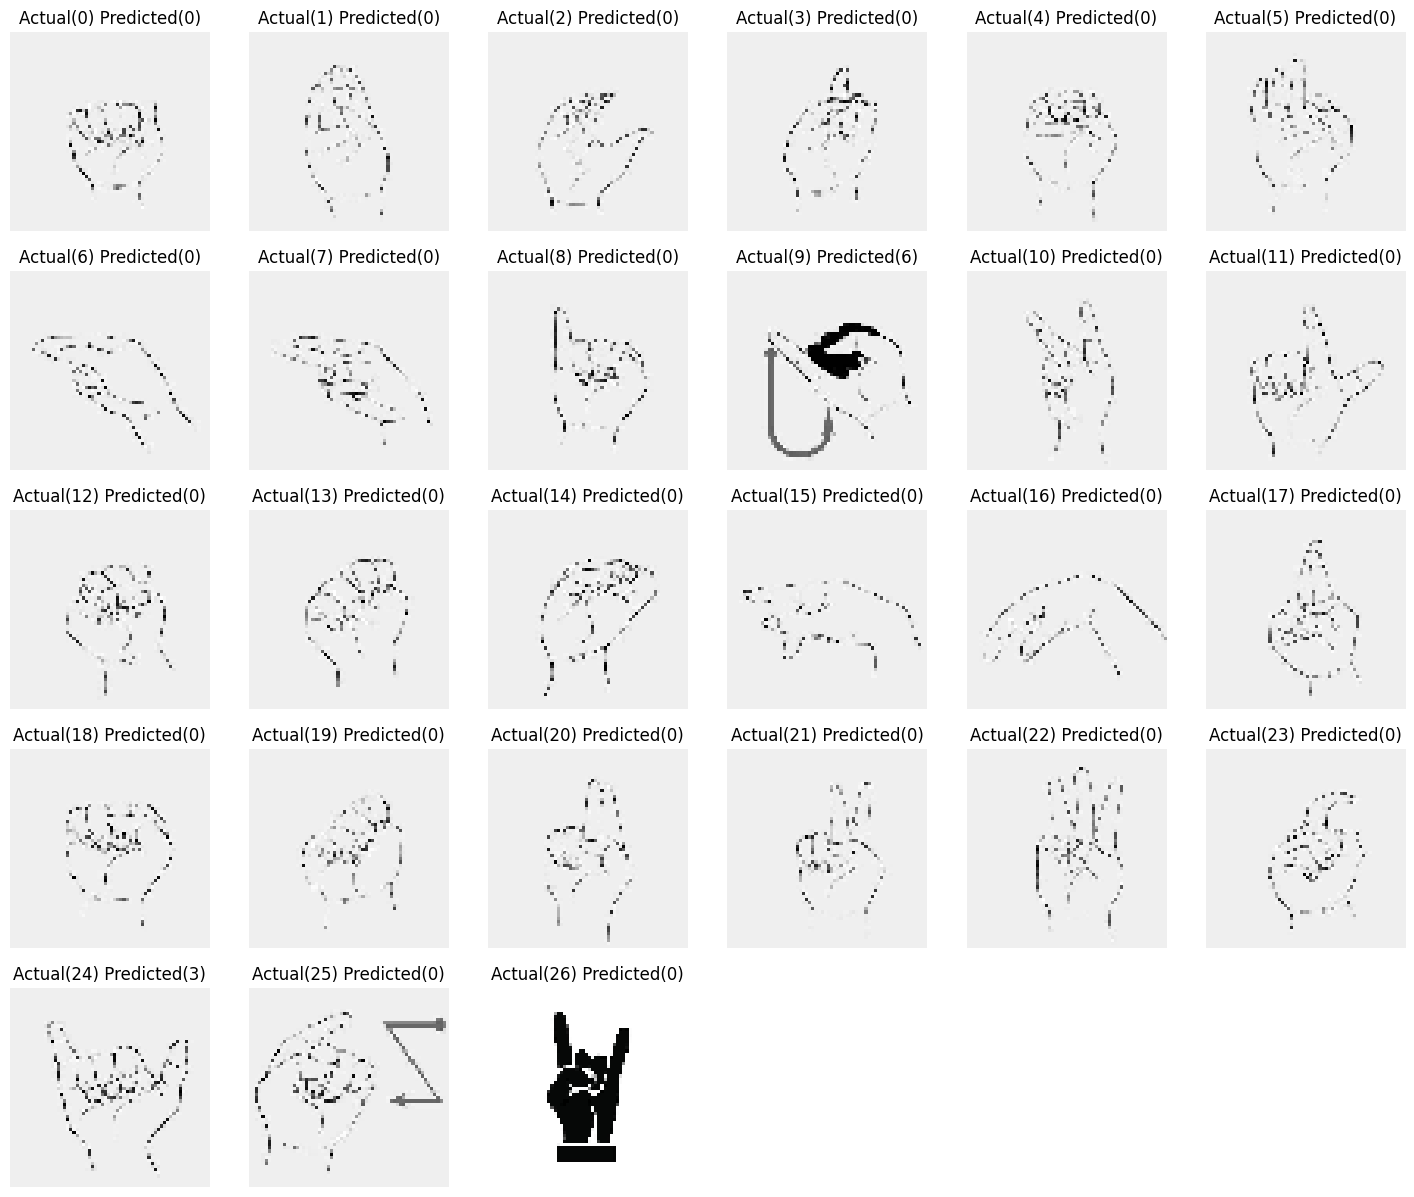

In [13]:
nrow, ncol = 5,6
plt.rcParams['figure.figsize'] = (ncol*3, nrow*3)
for row in range(len(lists)):
        # load image
        img = image.load_img('E:/xampp/htdocs/sign/image/' + lists[row] + '.jpg', target_size = (64, 64))
        # convert image into array for prediction
        test_image = image.img_to_array(img)
        test_image = np.expand_dims(test_image, axis = 0)
        # predict image using classifier
        result = classifier.predict(test_image).argmax()
        plt.subplot(nrow, ncol, row + 1)
        plt.imshow(img)
        plt.title("Actual({}) Predicted({})".format(row, result))
        plt.axis('off')

In [14]:
# model_json = classifier.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")
# model.load_weights('model.h5')

Saved model to disk
